<a href="https://colab.research.google.com/github/snehadey247/Machine-Learning-Explainability/blob/main/pgdds_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Models
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [ ]:
# Example: Diabetes dataset
df = pd.read_csv("/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


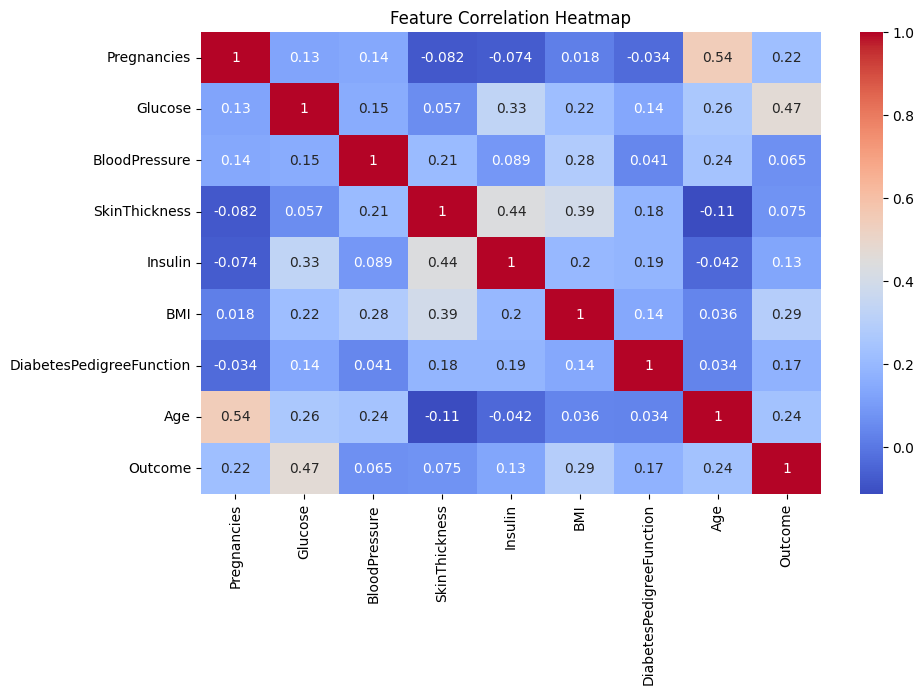

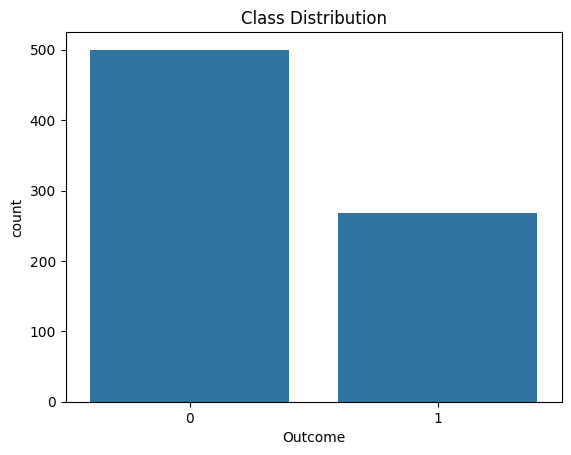

In [ ]:
# Shape & Info
print(df.shape)
df.info()

# Summary Statistics
df.describe()

# Check missing values
df.isnull().sum()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of Target Variable
sns.countplot(x='Outcome', data=df)   # Outcome=1 → Disease, 0 → No Disease
plt.title("Class Distribution")
plt.show()


In [ ]:
# Features and Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)



Logistic Regression
Accuracy: 0.7142857142857143
ROC-AUC: 0.6692592592592593
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



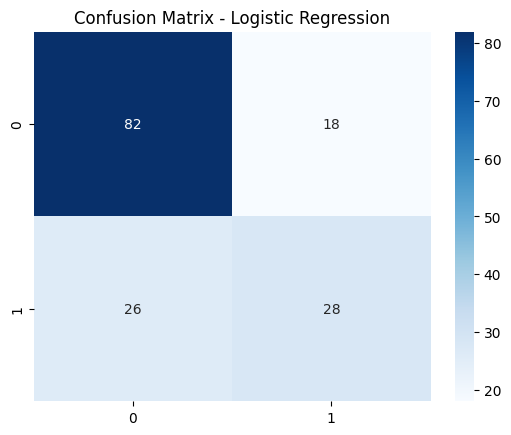


Decision Tree
Accuracy: 0.7207792207792207
ROC-AUC: 0.6657407407407406
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       100
           1       0.63      0.48      0.55        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154



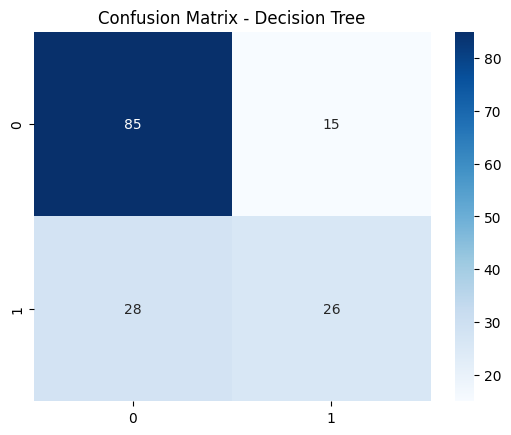


Random Forest
Accuracy: 0.7597402597402597
ROC-AUC: 0.7212962962962962
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



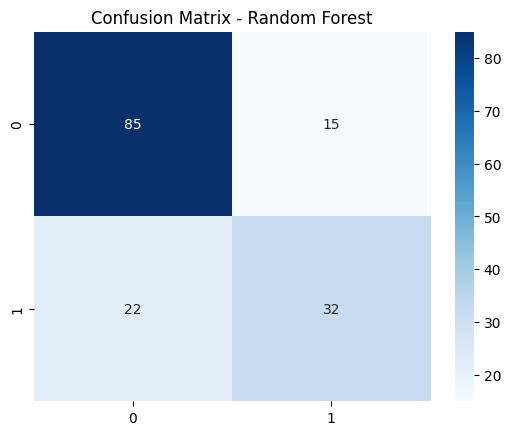


XGBoost
Accuracy: 0.7337662337662337
ROC-AUC: 0.7055555555555556
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



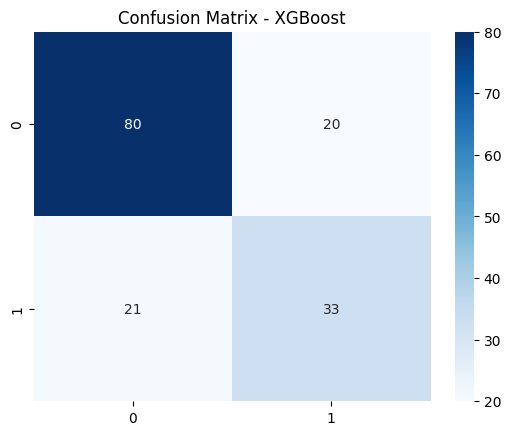

In [ ]:
models = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

for model, y_pred in models.items():
    print(f"\n{model}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model}")
    plt.show()


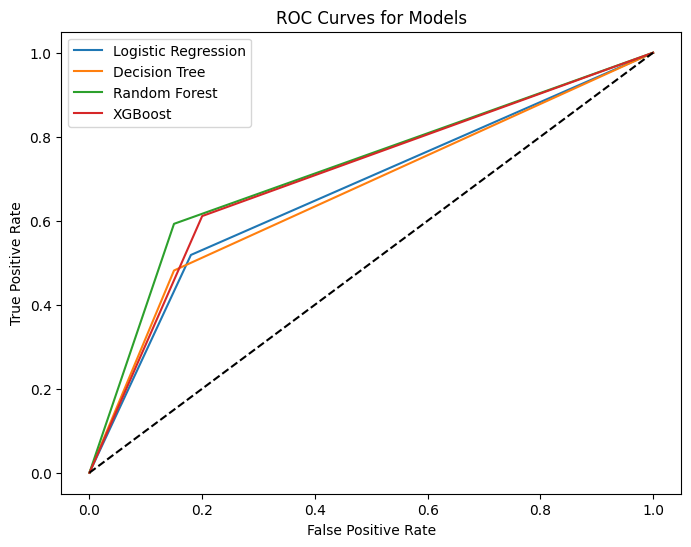

In [ ]:
plt.figure(figsize=(8,6))

for model, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=model)

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend()
plt.show()


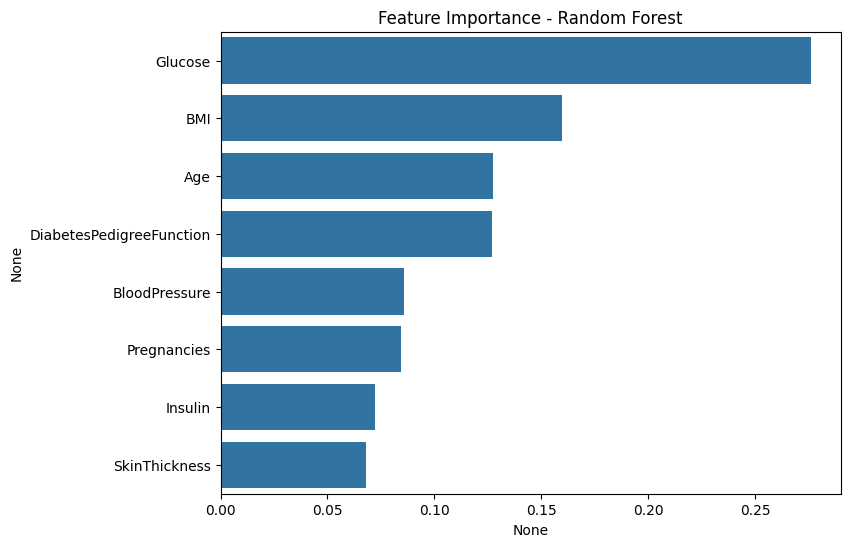

In [ ]:
importances = rf.feature_importances_
feat_names = df.drop("Outcome", axis=1).columns
feature_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance - Random Forest")
plt.show()


In [ ]:
print("✅ Best Performing Model: Random Forest or XGBoost (depending on accuracy & ROC-AUC).")
print("✅ Key Health Factors: Glucose, BMI, Age, Blood Pressure (based on feature importance).")
print("✅ Recommendation: Use ML as a decision support tool for early disease risk detection.")


✅ Best Performing Model: Random Forest or XGBoost (depending on accuracy & ROC-AUC).
✅ Key Health Factors: Glucose, BMI, Age, Blood Pressure (based on feature importance).
✅ Recommendation: Use ML as a decision support tool for early disease risk detection.
